# http://learningtensorflow.com/lesson4/

In [24]:
import numpy as np
%matplotlib notebook

In [1]:

import tensorflow as tf

x = tf.placeholder("float", 3)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


In [8]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]
    result = session.run(y, feed_dict={x: x_data})
    print(result)


[[  2.   4.   6.]
 [  8.  10.  12.]
 [ 14.  16.  18.]]


We can extend this to take an arbitrary number of None dimensions. In this example, we load up the image from our last lesson, then create a placeholder that stores a slice of that image. The slice is a 2D segment of the image, but each “pixel” has three components (red, green, blue). Therefore, we need None for the first two dimensions, but need 3 (or None would work) for the last dimension. We then use TensorFlow’s slice method to take a subsegment out of the image to operate on.

(5528, 3685, 3)
(3000, 3685, 3)


<IPython.core.display.Javascript object>


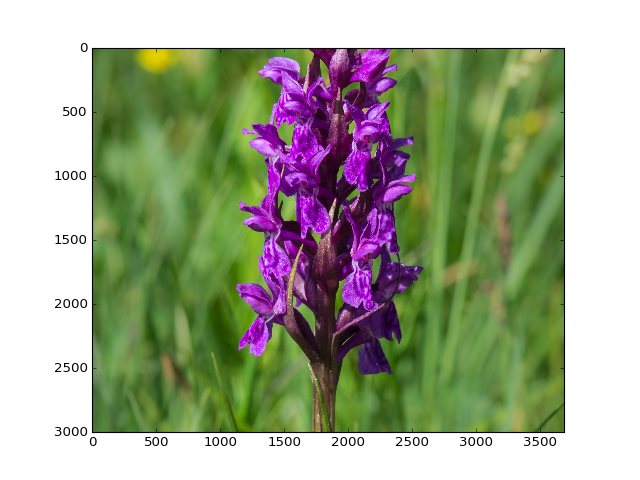

In [21]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)
print(raw_image_data.shape)

image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

# grayscale

rgb2gray converts RGB values to grayscale values by forming a weighted sum of the R, G, and B components:

0.2989 * R + 0.5870 * G + 0.1140 * B

In [56]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)

gray_image_data = raw_image_data.mean(2)

(3000, 3685)


<IPython.core.display.Javascript object>


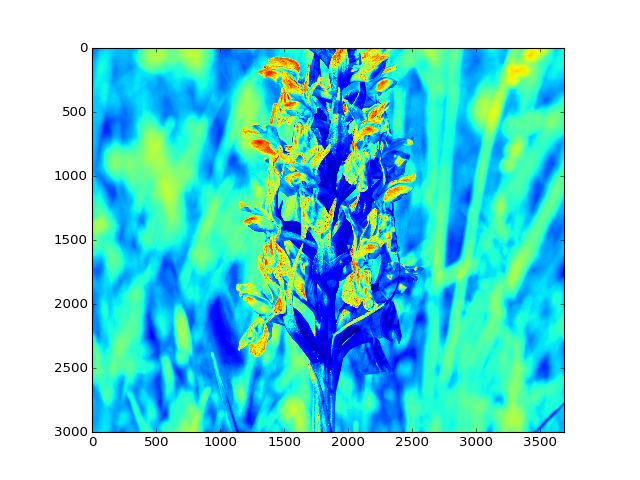

In [57]:
image = tf.placeholder("uint8", [None, None])
slice = tf.slice(image, [1000, 0], [3000, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: gray_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()